In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,max_salary,avg_salary,company_text,job_state,age,python_ym,R_ym,spark,aws,excel
0,Staff Data Scientist I,127 k$-203 k$ (Esti. de Glassdoor),Data Scientist – Machine Learning & Real-Time ...,3.4,Valassis\n3.4,"Morrisville, NC",-1,1001 to 5000 Employees,1970,Company - Private,...,203,165.0,Valassis\n,Morrisville,50,0,0,1,0,0
1,Sr. Data Scientist,71 k$-118 k$ (Esti. de Glassdoor),Medifast is seeking a full-time Senior Data Sc...,3.0,"Medifast, Inc.\n3.0","Baltimore, MD",-1,501 to 1000 Employees,1980,Company - Public,...,118,94.5,"Medifast, Inc.\n",Baltimore,40,1,0,1,1,0
2,FCC Data Scientist,73 k$-121 k$ (Esti. de Glassdoor),Summary: The FCC Analytics group is responsibl...,3.0,BankUnited\n3.0,"Miami Lakes, FL",-1,1001 to 5000 Employees,2009,Company - Public,...,121,97.0,BankUnited\n,Miami Lakes,11,1,0,0,0,0
3,Spark/Big Data Engineer,52 k$-101 k$ (Esti. de Glassdoor),The Data Consumption team of Decision Sciences...,3.4,GEICO\n3.4,"Chevy Chase, MD",-1,10000+ Employees,1936,Subsidiary or Business Segment,...,101,76.5,GEICO\n,Chevy Chase,84,0,0,1,0,1
4,Data Scientist,79 k$-127 k$ (Esti. de Glassdoor),Job Title: Data Scientists\n\nJob Description\...,2.2,Great-Circle Technologies\n2.2,"Chantilly, VA",-1,1 to 50 Employees,2000,Company - Private,...,127,103.0,Great-Circle Technologies\n,Chantilly,20,1,0,1,1,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'min_salary',
       'max_salary', 'avg_salary', 'company_text', 'job_state', 'age',
       'python_ym', 'R_ym', 'spark', 'aws', 'excel'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else :
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else : 
        return 'na'
    

In [6]:
df['job_simp']=df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data scientist    48
na                15
analyst           13
data engineer      9
manager            3
mle                2
Name: job_simp, dtype: int64

In [8]:
df['seniority']=df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        79
senior    11
Name: seniority, dtype: int64

In [9]:
df.job_state.value_counts()


Atlanta        6
Cambridge      5
New York       4
Chantilly      3
Chevy Chase    3
              ..
Burlingame     1
Richmond       1
Ames           1
Omaha          1
Maryland       1
Name: job_state, Length: 66, dtype: int64

In [10]:
df.drop('job state', inplace = True, axis =1)

KeyError: "['job state'] not found in axis"

In [11]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0     4213
1     3118
2     4816
3     3282
4     4000
      ... 
85    3390
86    6103
87    1740
88    4665
89    2630
Name: desc_len, Length: 90, dtype: int64

In [12]:
df.company_text

0                               Valassis\n
1                         Medifast, Inc.\n
2                             BankUnited\n
3                                  GEICO\n
4              Great-Circle Technologies\n
                      ...                 
85              Samsung Research America\n
86                             Workhuman\n
87                               Group O\n
88            Idaho Central Credit Union\n
89    Alco Manufacturing Corporation LLC\n
Name: company_text, Length: 90, dtype: object

In [13]:
df['company_text'] = df.['company_text'].apply(lambda x: x.replace('\n',''))

AttributeError: 'DataFrame' object has no attribute 'company_txt'

In [14]:
df['company_text']

0                               Valassis\n
1                         Medifast, Inc.\n
2                             BankUnited\n
3                                  GEICO\n
4              Great-Circle Technologies\n
                      ...                 
85              Samsung Research America\n
86                             Workhuman\n
87                               Group O\n
88            Idaho Central Credit Union\n
89    Alco Manufacturing Corporation LLC\n
Name: company_text, Length: 90, dtype: object

In [16]:
df['company_text'] = df['company_text'].apply(lambda x: x.replace('\n',''))


In [17]:
df['company_text']


0                               Valassis
1                         Medifast, Inc.
2                             BankUnited
3                                  GEICO
4              Great-Circle Technologies
                     ...                
85              Samsung Research America
86                             Workhuman
87                               Group O
88            Idaho Central Credit Union
89    Alco Manufacturing Corporation LLC
Name: company_text, Length: 90, dtype: object

In [18]:
df.describe()

,Rating,Headquarters,Founded,min_salary,max_salary,avg_salary,age,python_ym,R_ym,spark,aws,excel,desc_len
count,90.000000,90.0,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.268889,-1.0,1734.044444,79.611111,134.766667,107.188889,38.822222,0.566667,0.011111,0.277778,0.222222,0.455556,3862.477778
std,1.303896,0.0,652.538688,13.959568,22.333554,18.009295,46.406503,0.498312,0.105409,0.450412,0.418069,0.500811,1409.313876
min,-1.000000,-1.0,-1.000000,30.000000,55.000000,42.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1445.000000
25%,3.000000,-1.0,1940.500000,80.000000,132.000000,106.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2784.000000
50%,3.600000,-1.0,1983.000000,80.000000,132.000000,106.000000,22.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3637.500000
75%,3.975000,-1.0,2002.000000,89.000000,153.000000,121.000000,49.250000,1.000000,0.000000,1.000000,0.000000,1.000000,4788.250000
max,5.000000,-1.0,2018.000000,127.000000,203.000000,165.000000,239.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7428.000000


In [19]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'min_salary',
       'max_salary', 'avg_salary', 'company_text', 'job_state', 'age',
       'python_ym', 'R_ym', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len'],
      dtype='object')

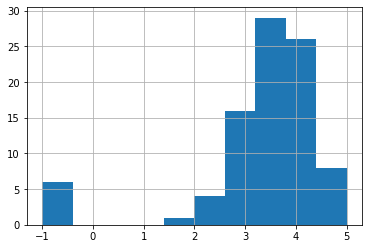

In [20]:
df.Rating.hist()

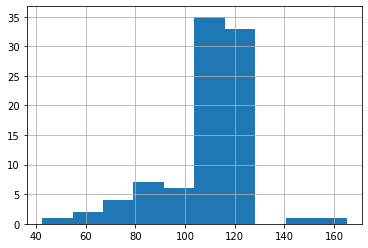

In [21]:
df.avg_salary.hist()

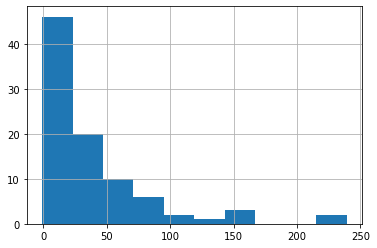

In [22]:
df.age.hist()

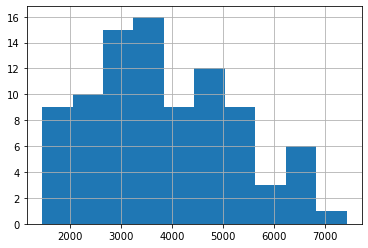

In [23]:
df.desc_len.hist()

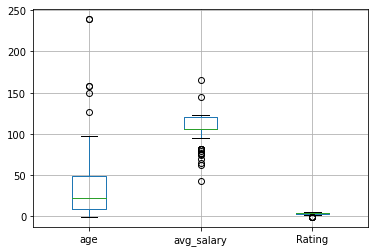

In [25]:
df.boxplot(column = ['age','avg_salary','Rating'])

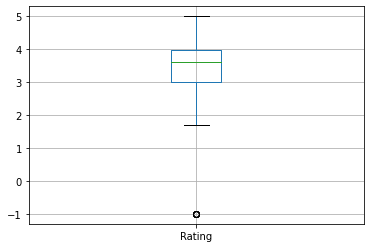

In [26]:
df.boxplot(column = ['Rating'])

In [29]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,-0.017625,0.211891,0.032301
avg_salary,-0.017625,1.000000,-0.049892,-0.012409
Rating,0.211891,-0.049892,1.000000,-0.205986
desc_len,0.032301,-0.012409,-0.205986,1.000000


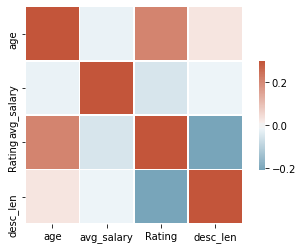

In [31]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(), vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [32]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'min_salary',
       'max_salary', 'avg_salary', 'company_text', 'job_state', 'age',
       'python_ym', 'R_ym', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len'],
      dtype='object')

In [33]:
df_cat = df[['Location', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_text', 'job_state', 'python_ym', 'R_ym', 'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location : total = 67


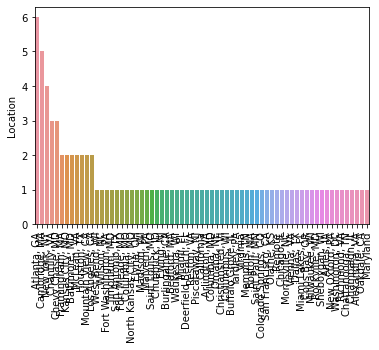

graph for Size : total = 8


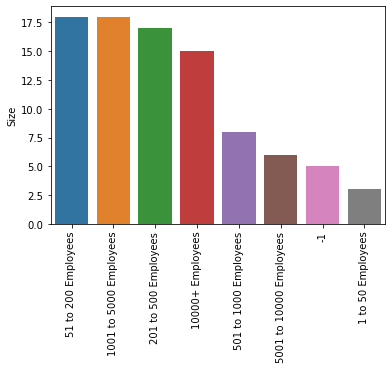

graph for Type of ownership : total = 8


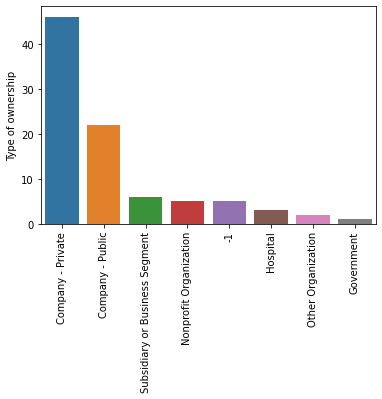

graph for Industry : total = 29


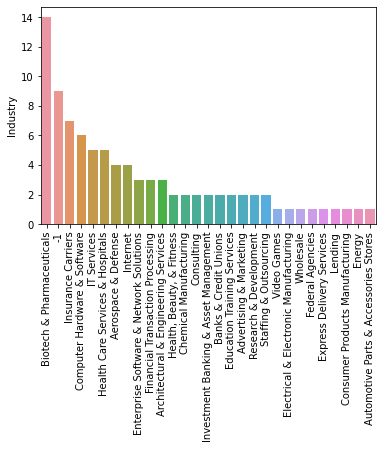

graph for Sector : total = 16


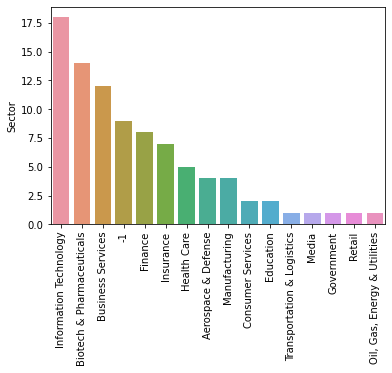

graph for Revenue : total = 14


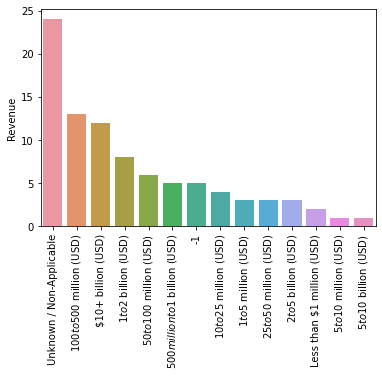

graph for company_text : total = 83


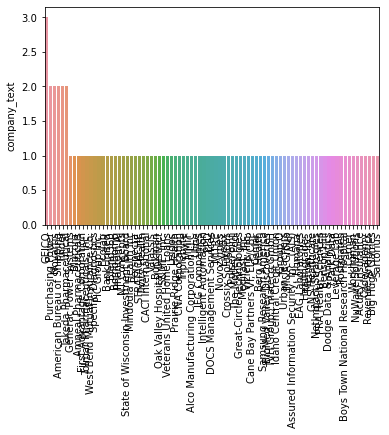

graph for job_state : total = 66


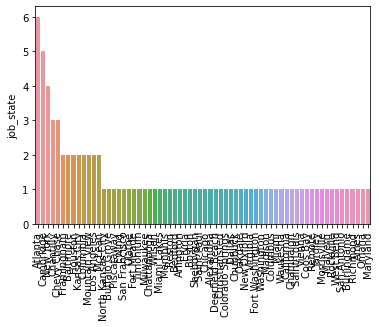

graph for python_ym : total = 2


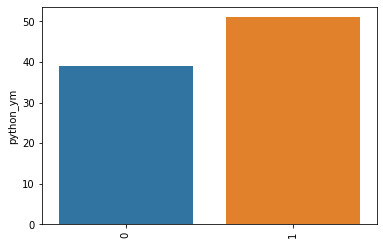

graph for R_ym : total = 2


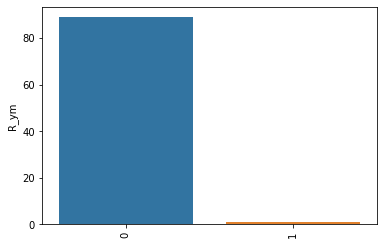

graph for spark : total = 2


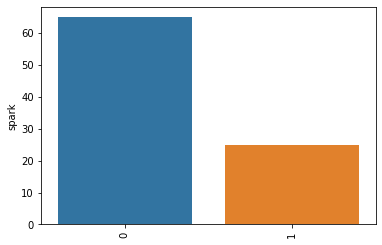

graph for aws : total = 2


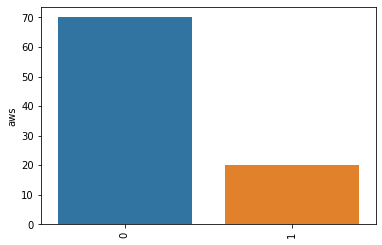

graph for excel : total = 2


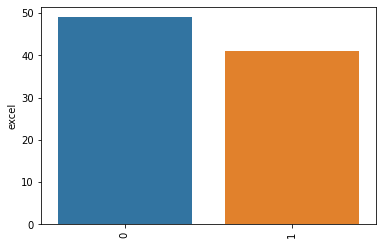

graph for job_simp : total = 6


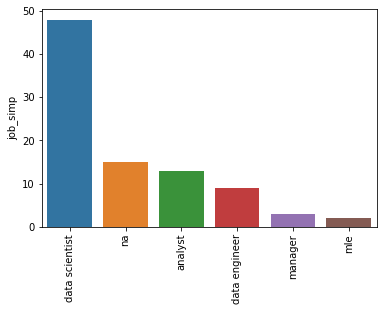

graph for seniority : total = 2


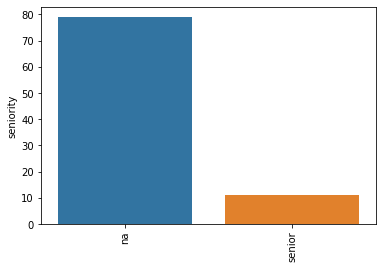

In [37]:
for i in df_cat.columns :
    cat_num = df_cat[i].value_counts()
    print("graph for %s : total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location : total = 30


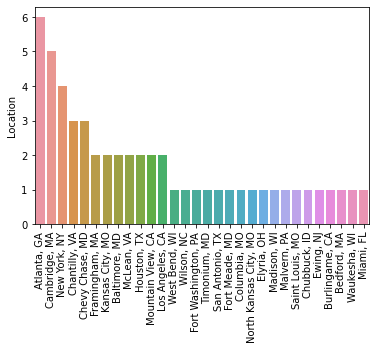

graph for company_text : total = 30


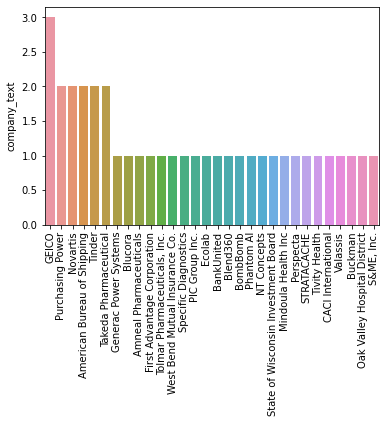

In [43]:
for i in df_cat[['Location', 'company_text']].columns :
    cat_num = df_cat[i].value_counts()[:30]
    print("graph for %s : total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [44]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'min_salary',
       'max_salary', 'avg_salary', 'company_text', 'job_state', 'age',
       'python_ym', 'R_ym', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len'],
      dtype='object')

In [45]:
pd.pivot_table(df, index='job_simp',values='avg_salary')

,avg_salary
job_simp,
analyst,104.346154
data engineer,102.055556
data scientist,109.770833
manager,116.000000
mle,113.500000
na,101.866667


In [46]:
pd.pivot_table(df, index=['job_simp', 'seniority'],values='avg_salary')

avg_salary
job_simp       seniority            
analyst        na         104.208333
               senior     106.000000
data engineer  na          99.687500
               senior     121.000000
data scientist na         110.287500
               senior     107.187500
manager        na         116.000000
mle            na         113.500000
na             na         104.142857
               senior      70.000000

In [49]:
pd.pivot_table(df, index=['job_state', 'job_simp'],values='avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state  job_simp                  
Yardley    data scientist       106.0
Wilson     na                    62.0
West Bend  data engineer        121.0
Waukesha   data engineer         64.5
Washington data scientist       106.0
...                               ...
Atlanta    analyst              121.0
           na                    75.5
Arlington  analyst              106.0
Ames       na                    79.5
Alexandria mle                  121.0

[76 rows x 1 columns]

In [50]:
pd.options.display.max_rows

60

In [51]:
pd.set_option('display.max_rows', None)

In [53]:
pd.pivot_table(df, index=['job_state', 'job_simp'],values='avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

,,avg_salary
job_state,job_simp,
Yardley,data scientist,1
Wilson,na,1
West Bend,data engineer,1
Waukesha,data engineer,1
Washington,data scientist,1
Virginia,mle,1
Vienna,data scientist,1
Timonium,analyst,1
Sheboygan,data scientist,1


In [56]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index=['job_state'],values='avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
Morrisville,165.000
Fort Meade,122.500
Boston,121.000
California,121.000
Chicago,121.000
Vienna,121.000
Remote,121.000
Deerfield Beach,121.000
San Francisco,121.000


In [64]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'python_ym','R_ym', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [68]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values='avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 4.4    144.500000
 5.0    121.000000
 4.8    121.000000
 2.5    121.000000
 4.6    121.000000
 4.0    117.625000
 3.5    117.250000
 2.9    116.000000
 3.4    115.916667
 4.2    113.500000
-1.0    113.500000
 3.2    113.500000
 3.8    108.450000
 3.6    107.600000
 3.9    106.000000
 4.9    106.000000
 3.3    104.300000
 3.7    103.571429
 2.2    103.000000
 3.0    102.312500
 2.6     97.166667
 2.7     95.500000
 4.1     94.900000
 4.5     94.000000
 4.3     89.125000
 1.7     82.000000
 2.8     62.000000
Industry
                                         avg_salary
Industry                                           
Advertising & Marketing                  135.500000
Education Training Services              121.000000
Express Delivery Services                121.000000
Automotive Parts & Accessories Stores    121.000000
Lending                                  121.000000
Investment Banking & Asset Management    113.500000
Financial Transac

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [70]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_ym', values = 'avg_salary', aggfunc = 'count')

python_ym,0,1
Revenue,,
$1 to $2 billion (USD),3.0,5.0
$1 to $5 million (USD),NaN,3.0
$10 to $25 million (USD),4.0,NaN
$10+ billion (USD),6.0,6.0
$100 to $500 million (USD),5.0,8.0
$2 to $5 billion (USD),2.0,1.0
$25 to $50 million (USD),1.0,2.0
$5 to $10 billion (USD),1.0,NaN
$5 to $10 million (USD),NaN,1.0


In [71]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

ModuleNotFoundError: No module named 'wordcloud'

In [72]:
!pip install wordcloud

     |████████████████████████████████| 162 kB 1.3 MB/s eta 0:00:01


In [73]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [74]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())    
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width = 800, heigt = 1500)
wc.generate(text)

plt.figure(figsize=[10, 10])
plt.inshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/pierreperrin/nltk_data'
    - '/Users/pierreperrin/opt/anaconda3/nltk_data'
    - '/Users/pierreperrin/opt/anaconda3/share/nltk_data'
    - '/Users/pierreperrin/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())    
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width = 800, heigt = 1500)
wc.generate(text)

plt.figure(figsize=[10, 10])
plt.inshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
plt.show()

In [1]:
df.describe()

NameError: name 'df' is not defined

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

NameError: name 'pd' is not defined